In [ ]:
# upgrade matplotlib on Colab
# !pip install matplotlib --upgrade

# Unidad 3 - Clasificación

## Árboles de desición

- Divide el espacio n-dimensional de las variables aleatorias
  - Hace sucesivas divisiones
    - Cada división parte el espacio en dos
    - La división se da por el valor de una única variable.
    - A cada una de las sub-regiones puede volver a subvidivirse.
  - Luego de una series de divisiones quedan definidos espacios que se
    assignan a un categoria.
  - Durante el entrenamiento
    - Se eligen las variables y los valores de corte de cada división


f:\projects\qualilative-data-analysis-course\.venv\lib\site-packages\scipy\stats\_multivariate.py:681: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


Text(0, 0.5, 'Var 2')

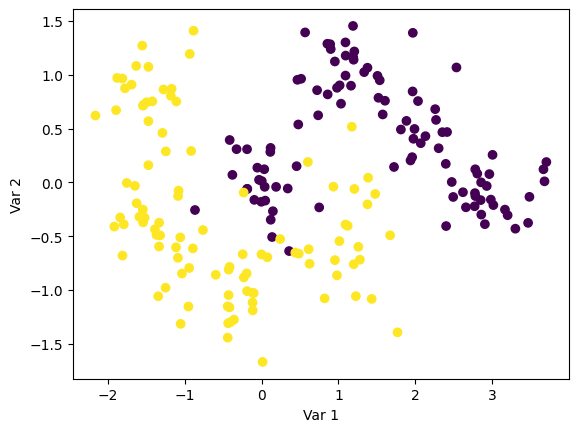

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

data_a = np.array(
  [[0, 0]] * 25 +
  [[1, 1]] * 25 +
  [[2, 0.5]] * 25 +
  [[3, 0]] * 25
)
data_a2 = st.multivariate_normal.rvs(
  [0 ,0],
  [[0, 0.1], [0.1, 0]],
  size = 100
)
data_a = data_a + data_a2

data_b = np.array(
  [[-1.5, -0.5]] * 25 +
  [[1.1, -0.5]] * 25 +
  [[-0.3, -1]] * 25 +
  [[-1.4, 0.7]] * 25
)
data_b2 = st.multivariate_normal.rvs(
  [0 ,0],
  [[0, 0.1], [0.1, 0]],
  size = 100
)
data_b = data_b + data_b2

data = np.row_stack((data_a, data_b))

plt.scatter(
  *(data.T.tolist()),
  c=[0] * 100 + [1] * 100,
)
plt.xlabel("Var 1")
plt.ylabel("Var 2")

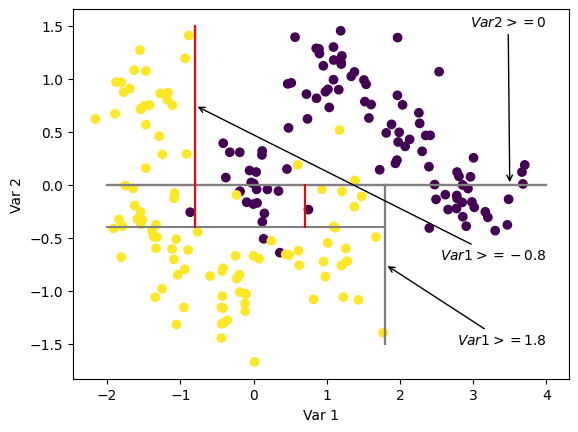

In [5]:

plt.xlabel("Var 1")
plt.ylabel("Var 2")
plt.scatter(*(data.T.tolist()), c=[0] * 100 + [1] * 100)
# Primer corte
plt.plot([-2, 4], [0, 0], color = "red")
plt.annotate(
  xy = (3.5, 0),
  xytext = (4, 1.5),
  text = "$Var2 >= 0$",
  arrowprops={"arrowstyle": "->"},
  ha = "right"
)

# Segundo corte
plt.plot([-2, 4], [0, 0], color = "gray")
plt.plot([1.8, 1.8], [-1.5, 0], color = "red")
plt.annotate(
  xy = (1.8, -0.75),
  xytext = (4, -1.5),
  text = "$Var1 >= 1.8$",
  arrowprops={"arrowstyle": "->"},
  ha = "right"
)

# Tercer corte
plt.plot([-2, 4], [0, 0], color = "gray")
plt.plot([1.8, 1.8], [-1.5, 0], color = "gray")
plt.plot([-0.80, -0.80], [0, 1.5], color = "red")
plt.annotate(
  xy = (-0.8, 0.75),
  xytext = (4, -0.7),
  text = "$Var1 >= -0.8$",
  arrowprops={"arrowstyle": "->"},
  ha = "right"
)

# Otros cortes
plt.plot([-2, 4], [0, 0], color = "gray")
plt.plot([1.8, 1.8], [-1.5, 0], color = "gray")
plt.plot([-2, 1.8], [-0.4, -0.4], color = "gray")
plt.plot([-0.8, -0.8], [0, -0.4], color = "red")
plt.plot([0.70, 0.70], [0, -0.4], color = "red")
plt.plot([-0.80, -0.80], [0, 1.5], color = "red")

Veamos como se hace en Python.

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
fitted = dt.fit(data, [0]*100 + [1]*100)

In [7]:
predicted = fitted.predict(data)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [8]:
all(predicted == [0] * 100 + [1] * 100)

True

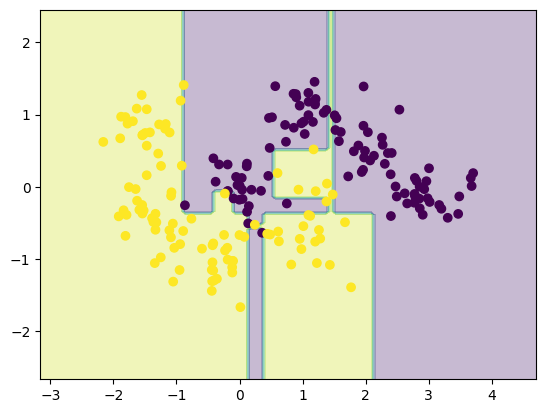

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
  dt,
  data,
  response_method="predict",
  alpha = 0.3
)
plt.scatter(*(data.T.tolist()), c=[0] * 100 + [1] * 100)


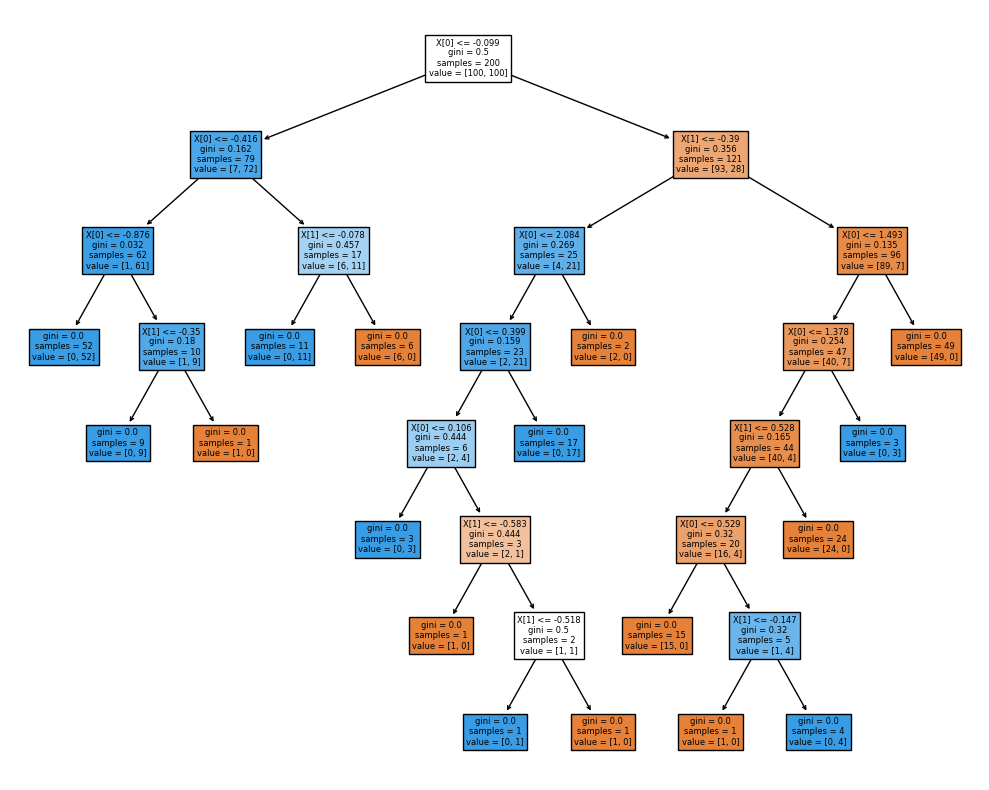

In [10]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(figsize=(10,8))
plot_tree(dt, filled=True, ax = axes)
fig.tight_layout()

In [11]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

df = iris["frame"]

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd

train, test = train_test_split(df)
tree = DecisionTreeClassifier()

fitted = tree.fit(train.drop(columns=["target"]), train["target"])

predicted = fitted.predict(test.drop(columns=["target"]))

prediction = pd.Series(predicted==test["target"]).value_counts()
accuracy = prediction[True] / prediction.sum()

print(f"Accuracy: {accuracy}")


Accuracy: 0.9210526315789473


[Text(0.42857142857142855, 0.9375, 'X[3] <= 0.8\ngini = 0.663\nsamples = 112\nvalue = [41, 32, 39]'),
 Text(0.2857142857142857, 0.8125, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5714285714285714, 0.8125, 'X[2] <= 4.75\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.42857142857142855, 0.6875, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.7142857142857143, 0.6875, 'X[2] <= 5.05\ngini = 0.169\nsamples = 43\nvalue = [0, 4, 39]'),
 Text(0.5714285714285714, 0.5625, 'X[0] <= 6.5\ngini = 0.48\nsamples = 10\nvalue = [0, 4, 6]'),
 Text(0.42857142857142855, 0.4375, 'X[1] <= 3.1\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.2857142857142857, 0.3125, 'X[0] <= 6.25\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(0.14285714285714285, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.42857142857142855, 0.1875, 'X[2] <= 4.95\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2857142857142857, 0.0625, 'gini = 0.0\nsamples = 1\nvalu

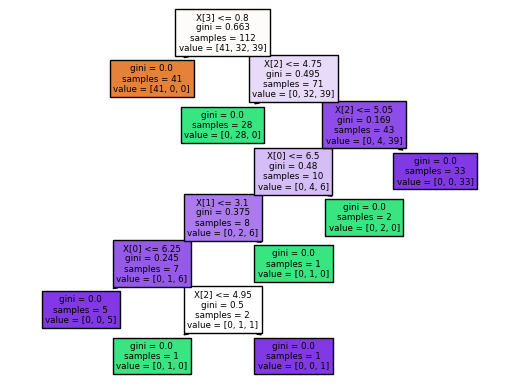

In [13]:
from sklearn.tree import plot_tree

plot_tree(
  fitted,
  filled = True
)

### RandomForest

- Se construyen muchos arboles de decisión
- Se elije por votación simple.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

# Create Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Create 5-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=k_fold)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean CV accuracy: 0.9600000000000002
